<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#[Logistic-Regression]" data-toc-modified-id="[Logistic-Regression]-1"><font color="blue">[Logistic Regression]</font></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#로지스틱-비용-함수의-가중치-학습" data-toc-modified-id="로지스틱-비용-함수의-가중치-학습-1.0.1">로지스틱 비용 함수의 가중치 학습</a></span></li><li><span><a href="#아달린-구현을-로지스틱-회귀-알고리즘으로-변경" data-toc-modified-id="아달린-구현을-로지스틱-회귀-알고리즘으로-변경-1.0.2">아달린 구현을 로지스틱 회귀 알고리즘으로 변경</a></span></li><li><span><a href="#Logistic-Regression-직접-구현" data-toc-modified-id="Logistic-Regression-직접-구현-1.0.3">Logistic Regression 직접 구현</a></span></li><li><span><a href="#사이킷런에서-Logistic-Regression" data-toc-modified-id="사이킷런에서-Logistic-Regression-1.0.4">사이킷런에서 Logistic Regression</a></span></li><li><span><a href="#로지스틱-모델-성능지표-확인" data-toc-modified-id="로지스틱-모델-성능지표-확인-1.0.5">로지스틱 모델 성능지표 확인</a></span><ul class="toc-item"><li><span><a href="#threshold에-따른-성능지표-비교-후-가장-높은-ACC-반납하는-함수-만들기" data-toc-modified-id="threshold에-따른-성능지표-비교-후-가장-높은-ACC-반납하는-함수-만들기-1.0.5.1">threshold에 따른 성능지표 비교 후 가장 높은 ACC 반납하는 함수 만들기</a></span></li></ul></li><li><span><a href="#Feature-Selection-again-&amp;-성능-측정" data-toc-modified-id="Feature-Selection-again-&amp;-성능-측정-1.0.6">Feature Selection again &amp; 성능 측정</a></span></li></ul></li></ul></li><li><span><a href="#[KNN]" data-toc-modified-id="[KNN]-2"><font color="blue">[KNN]</font></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Weighted-KNN" data-toc-modified-id="Weighted-KNN-2.0.1">Weighted KNN</a></span></li></ul></li><li><span><a href="#3.7-k-최근접-이웃:-게으른-학습-알고리즘" data-toc-modified-id="3.7-k-최근접-이웃:-게으른-학습-알고리즘-2.1">3.7 k-최근접 이웃: 게으른 학습 알고리즘</a></span></li></ul></li><li><span><a href="#k-Nearest-Neighborhood-Algorithm-실습" data-toc-modified-id="k-Nearest-Neighborhood-Algorithm-실습-3">k-Nearest Neighborhood Algorithm 실습</a></span></li><li><span><a href="#1.-데이터,-모듈-불러오기-및-kNN-피팅-방법" data-toc-modified-id="1.-데이터,-모듈-불러오기-및-kNN-피팅-방법-4">1. 데이터, 모듈 불러오기 및 kNN 피팅 방법</a></span></li><li><span><a href="#2.Cross-validation을-활용한-최적의-k찾기" data-toc-modified-id="2.Cross-validation을-활용한-최적의-k찾기-5">2.Cross-validation을 활용한 최적의 k찾기</a></span></li><li><span><a href="#2.Weight를-준-kNN" data-toc-modified-id="2.Weight를-준-kNN-6">2.Weight를 준 kNN</a></span></li></ul></div>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import itertools
import time
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# <font color='blue'>[Logistic Regression]</font>

- 로지스틱 회귀는 기본적으로 '이진분류를 위한 선형모델'이다.
    - 다중 클래스 환경에서 사용하기 위해 "OvR" 기법을 사용할 수 있다.<br>
    
    

오즈비(특정 이벤트가 발생할 확률) $=\dfrac{P}{1-P}$ , ($P$는 양성 샘플에 대한 확률) 여기서 양성샘플이란 "예측하려는 대상"

로짓 함수 : $logit(P)=log\dfrac{P}{1-P}$

$0\le P \le 1$이면, $0 \le \dfrac{P}{1-P} \le \infty$이고, $-\infty \le log\dfrac{P}{1-P} \le \infty$이므로

$log\dfrac{P}{1-P}=\boldsymbol{w}^T\boldsymbol{x}$처럼 쓸 수 있다. <br>

- $logit(P(y=1|x)) = \boldsymbol{w}^T\boldsymbol{x}$
    - 위 식의 의미는 특성 $\boldsymbol{x}$가 주어졌을 때 이 샘플이 클래스 1에 속할 조건부 확률이다.

> 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것이 관심 대상이므로 logit 함수를 거꾸로 뒤집는다. => 이를 로지스틱 시그모이드 함수, 또는 시그모이드 함수라고 한다. (함수 모양이 s자 형태라서 시그모이드 함수..)<br><br>

양성 샘플일 확률 $P = \dfrac{1}{1+e^{-\boldsymbol{w}^T\boldsymbol{x}}}=\dfrac{1}{1+e^{-z}}$

In [8]:
Image(url='https://s3-ap-northeast-2.amazonaws.com/opentutorials-user-file/module/3653/9840.png', width=700)

In [9]:
Image(url='https://git.io/Jtm22', width=500) 

예측 확률 : $\hat{y}=\begin{cases}1&\phi(z)\ge 0.5\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\hat y=\begin{cases}1&z\ge 0\mbox{ 일 때} \\ 0&\mbox{그 외}\end{cases}$

- 시그모이드 함수의 출력, 즉 $\phi (z)$의 실수값은 '특정 샘플이 클래스 1에 속할 확률'이라고 해석한다.

### 로지스틱 비용 함수의 가중치 학습
**가능도** : $L(\boldsymbol w)=\prod^n_{i=1}P(y^{(i)} | x^{(i)};w)=\prod^n_{i=1}\phi(z^{(i)})^{y^{(i)}}\left(1-\phi(z^{(i)})\right)^{1-y^{(i)}}$ <br>

- n개의 샘플이 해당 클래스에 속할 확률을 곱한 것이 가능도
    - 양성 샘플일 경우 $1-y^{(i)}$가 1이 되어 두 번째 항이 0이 되고, 반대로 음성 샘플일 때는 $1-y^{(i)}$가 0이 된다.
    - 따라서.. 가능도가 최대가 되려면 양성 샘플의 $\phi(z^{(i)})$는 가능한 크고, 음성 샘플의 $\phi(z^{(i)})$는 가능한 작아야 한다.

로그 가능도 : $\text{log} L(\boldsymbol w)=\sum^n_{i=1}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$<br>

- 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로(underflow)를 미연에 방지한다.
- 계수의 곱을 계수의 합으로 바꿀 수 있다.
- 미적분 하기 쉽다
- 경사상승법 같은 최적화 알고리즘을 이용하면 이 로그 가능도 함수를 최대화할 수 있다.

로지스틱 비용 함수 : $J(\boldsymbol w)=\sum^n_{i=1}\left[-y^{(i)}\text{log}\phi(z^{(i)})-(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right]$<br>

- 또는.. 로그 가능도 함수를 비용함수 J로 표현하여(로그가능도 함수에 마이너스 부호) 경사 하강법을 사용하여 최소화할 수도 있다.

손실 계산 : $J(\boldsymbol w)=\begin{cases}-\text{log}\phi(z)&y=1\mbox{ 일 때} \\ -\text{log}(1-\phi(z))&y=0\mbox{일 때}\end{cases}$<br>

- y가 1이면 두 번째 항이 0이 되고,
- y가 0이면 첫 번째 항이 0이 된다.<br>

> 기억할 점이.. $w^Tx$ 에다가 sigmoid function을 적용시켜서 $\phi(z)$ 을 만들어 내는데, $\phi(z)$는 '양성 클래스일 확률'이다.<br>

> 그리고 이 activation function 값과 실제 레이블 값을 비교하는 '비용 함수'가 있어야 한다. 이 비용 함수를 정의하기 위한 시작이 '가능도 함수'다.<br>

> 가능도는.. "샘플데이터 x와 가중치 w가 주어졌을 때, y가 양성 레이블일 확률은 얼마냐?" 는 질문에 대한 답이다. 예를 들어, sigmoid(샘플데이터\*가중치) 값인 $\phi(z)$가 엄청 높은데 실제 레이블 값이 음성이면.. 가능도는 엄청나게 낮아질 것이다.<br>

> 이 가능도 함수를 편리함을 위해 '로그'를 씌워준다. 그리고 이 로그 가능도 함수는 '단조증가 함수'기 때문에, 최대화 시키려면 경사 상승법 같은 걸 써야 하는데; 그냥 우리는 이 로그 가능도 함수에 마이너스를 붙여줘서 이걸 '비용 함수', 즉 '로지스틱 비용 함수'로 만들어주고 경사 하강법으로 최적화할 수 있는 것이다.

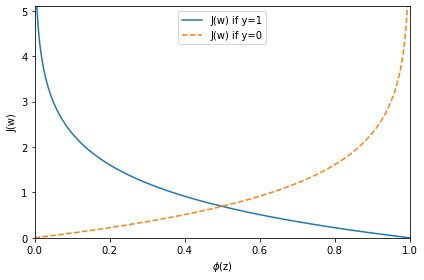

In [12]:
# 샘플이 하나인 경우 phi(z)값에 대한 분류 비용 그려보기
Image(filename='/Users/jihun/Documents/data_science/notebooks/mlbook_raschka/image/logistic.png', width=450)

- 클래스 1에 속한 샘플을 정확히 예측하면 비용이 0에 가까워지고, 클래스 0에 속한 샘플을 y=0으로 정확히 예측하면 y축의 비용이 0에 가까워 진다.
- 예측이 잘못되면 비용이 무한대가 된다.
    - "잘못된 예측에 점점 더 큰 비용을 부여한다는 점이 중요하다."

### 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

로지스틱 손실 함수의 미분 :

$\begin{align*}
\dfrac{\partial}{\partial w_j}J(\boldsymbol w)&=-\dfrac{\partial}{\partial w_j}\left[y^{(i)}\text{log}\phi(z^{(i)})+(1-y^{(i)})\text{log}\left(1-\phi(z^{(i)})\right)\right] \\
&=-y^{(i)}\dfrac{\partial}{\partial w_j}\text{log}\phi(z^{(i)})-(1-y^{(i)})\dfrac{\partial}{\partial w_j}\text{log}\left(1-\phi(z^{(i)})\right) \\
&=-y^{(i)}\dfrac{1}{\phi(z^{(i)})}\dfrac{\partial}{\partial w_j}\phi(z^{(i)})+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\dfrac{\partial}{\partial w_j}\phi(z^{(i)}) \\
&=\left(-y^{(i)}\dfrac{1}{\phi(z^{(i)})}+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\right)\dfrac{\partial}{\partial w_j}\phi(z^{(i)}) \\
\end{align*}$

시그모이드 함수를 z에 대해 미분하면 : 

$\dfrac{\partial}{\partial z}\phi(z)=\dfrac{\partial}{\partial z}\left(\dfrac{1}{1+e^{-z}}\right)=-\dfrac{1}{(1+e^{-z})^2}(-e^{-z})=\dfrac{1+e^{-z}-1}{(1+e^{-z})^2}=\dfrac{1+e^{-z}}{(1+e^{-z})^2}-\dfrac{1}{(1+e^{-z})^2}=\dfrac{1}{1+e^{-z}}\left(1-\dfrac{1}{1+e^{-z}}\right)=\phi(z)(1-\phi(z))$

따라서, 

$\begin{align*}
\dfrac{\partial}{\partial w_j}J(\boldsymbol w)&=\left(-y^{(i)}\dfrac{1}{\phi(z^{(i)})}+(1-y^{(i)})\dfrac{1}{\left(1-\phi(z^{(i)})\right)}\right)\phi(z^{(i)})\left(1-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}z^{(i)} \\
&=\left(-y^{(i)}\left(1-\phi(z^{(i)})\right)+(1-y^{(i)})\phi(z^{(i)})\right)x_j^{(i)}\\
&=\left(-y^{(i)}+y^{(i)}\phi(z^{(i)})+\phi(z^{(i)})-y^{(i)}\phi(z^{(i)})\right)x_j^{(i)}\\
&=-\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)}
\end{align*}$

> 결국.. J(w)의 negative gradient는 "(실제클래스값 - 시그모이드출력값) 곱하기 샘플데이터" 에다가 마이너스 부호 붙인 거다. 여기다가 learning rate를 곱한 것을 가중치에 빼면 '업데이트된 가중치'가 된다.

### Logistic Regression 직접 구현

In [13]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기
    
    매개변수
    ----------
    eta : float
      학습률
    n_iter : int
    random_state : int
    
    속성
    ----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값    
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산한다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### 사이킷런에서 Logistic Regression

In [22]:
ploan = pd.read_csv('../fastcampus/Data/Personal Loan.csv')

# 결측치 있는 행 제거 & 의미 없는 변수 제거 (ID, ZIP code)
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace=False)

# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')

# train, test split
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']  # 대출여부: 1 or 0

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=42)

ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [23]:
# logistic modelling and fitting
logit = sm.Logit(train_y, train_x)
fitted_logit = logit.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [24]:
# summary
fitted_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.6030
Time:                        09:33:46   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [25]:
# params(회귀계수)
fitted_logit.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [26]:
# exp
np.exp(fitted_logit.params)

## 나이가 한살 많을수록록 대출할 확률이 1.024배 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

### 로지스틱 모델 성능지표 확인

In [27]:
# y-hat
pred_y = fitted_logit.predict(test_x)

# logit의 pred 값이 1혹은 0이 되도록 하는 함수 정의
def cut_off(y, threshold):
    Y = y.copy()  # copy함수를 사용하여 이전의 y값이 변하지 않게 함
    # Y: 0 혹은 1의 예측값,    y: 0~1 사이 실수 예측값
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int64

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [28]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

# confusion matrix accuracy
print('accuracy:', (cfmat[0,0]+cfmat[1,1]) / len(pred_Y))

# accuracy 구하는 함수 정의
def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc

[[661  12]
 [ 28  49]]
accuracy: 0.9466666666666667


In [29]:
# cut_off의 threshold에 따른 성능지표 비교
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


#### threshold에 따른 성능지표 비교 후 가장 높은 ACC 반납하는 함수 만들기

In [30]:

def cut_off(y, threshold):
    Y = y.copy()  # copy함수를 사용하여 이전의 y값이 변하지 않게 함
    # Y: 0 혹은 1의 예측값,    y: 0~1 사이 실수 예측값
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))


def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1]) / (cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
    return acc



threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
result = []
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table



performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


In [31]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

AUC: 0.9463923891858513


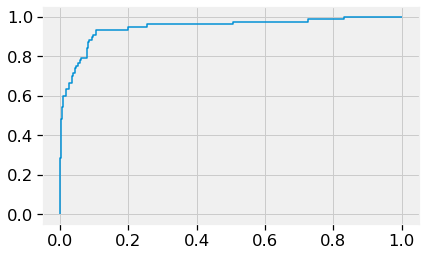

In [32]:
# sklearn ROC 패키지
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# print ROC curve
plt.plot(fpr, tpr)

# print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### Feature Selection again & 성능 측정
- 특이하게.. 로지스틱 회귀모형은 cut_off 함수를 지나기 전엔 '회귀' 값을 갖는다.
- 그러니까 변수선택법을 통해 regression 값의 AIC를 최대한 높이고,
- 그 후에 cut_off 함수를 지나게 해본다.

In [33]:
# 위 섹션에 정의된 함수 그대로 사용
    # !!processSubset에서 model만 logit으로 변경!!

def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [34]:
Forward_best_model = forward_model(train_x, train_y)
Backward_best_model = backward_model(train_x, train_y)
stepwise_best_model = stepwise_model(train_x, train_y)

# y-hat
pred_y_full = fitted_logit.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = stepwise_best_model.predict(test_x[stepwise_best_model.model.exog_names])

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

Optimization terminated successfully.
         Current function value: 0.134831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131871
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218281
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142684
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.155797
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152482
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131791
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131772
         Iterations 9
Processed  9 models on 8 predictors in 0.0709230899810791
Selected predictors: ['C

Optimization terminated successfully.
         Current function value: 0.131803
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132343
         Iterations 9
Processed  4 models on 8 predictors in 0.02821803092956543
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'CCAvg', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x154f65d90>
forward
Optimization terminated successfully.
         Current function value: 0.132361
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132650
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135373
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.136112
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.142716
         Iterations 9

In [35]:
# cut_off 함수 적용
pred_Y_full = cut_off(pred_y_full, 0.5)
pred_Y_forward = cut_off(pred_y_forward, 0.5)
pred_Y_backward = cut_off(pred_y_backward, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [36]:
# cfmat 만들기
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [37]:
# acc 함수 사용하기
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

## 추가로 ROC curve와 AUC도 구하면 됌.
    ## 결론: 이 데이터에서 변수선택법을 사용해도 logit regression의 성능이 큰 차이가 없음.

0.9466666666666667
0.944
0.944
0.944


# <font color='blue'>[KNN]</font>

In [38]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [39]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [40]:
# modelling and fitting
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

y_pred = clf.predict(X)
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

In [41]:
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

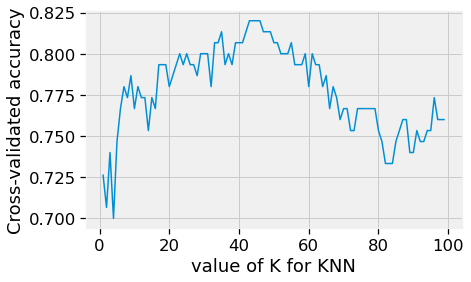

In [42]:
plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

### Weighted KNN

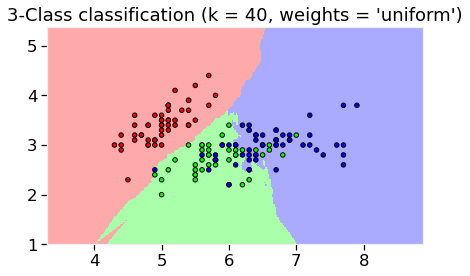

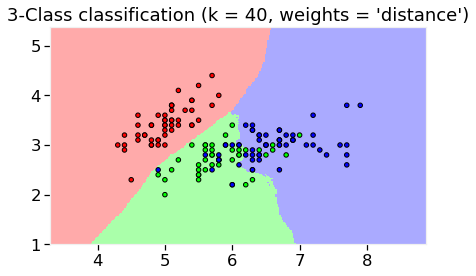

In [43]:
n_neighbors = 40
h = .02 # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [44]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [45]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

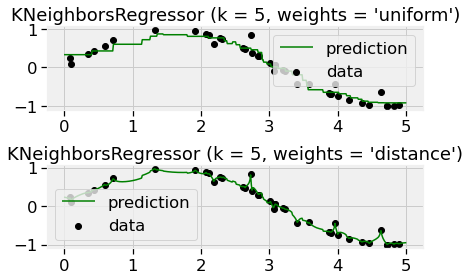

In [46]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

## 3.7 k-최근접 이웃: 게으른 학습 알고리즘

> KNN은 비모수 모델(nonparametric model)에 속하는 인스턴스 기반 모델이다. 인스턴스 기반 모델은 훈련 데이터셋을 메모리에 저장하는 것이 특징이다.

1. 숫자 k와 거리 측정 기준을 선택한다.
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통해 클래스 레이블을 할당한다.<br><br>

- 이런 메모리 기반 방식의 분류기는 수집된 새로운 훈련 데이터에 즉시 적용할 수 있는 것이 장점
- 새로운 샘플을 분류하는 계산 복잡도는 단점
- 훈련 단계가 없기 때문에 훈련 샘플을 버릴 수 없는 것도 단점
- 게다가 차원의 저주 때문에 과대적합되기 쉽다.
    - "고정된 크기의 훈련 데이터셋이 차원이 늘어남에 따라 특성 공간이 점점 희소해짐 => 고차원 공간에서는 가장 가까운 이웃이라도 좋은 추정 값을 만들기에는 너무 멀리 떨어져 있다."
    - 로지스틱 회귀에서는 과대적합을 피하기 위해 Regularization을 사용했는데, 결정 트리나 KNN처럼 regularization을 적용할 수 없는 모델에서는 '특성 선택'과 '차원 축소 기법'을 이용하기도 한다.

In [3]:
Image(url='https://git.io/Jtm25', width=400) 

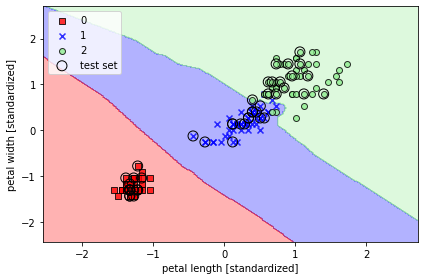

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                          p=2,
                          metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                     classifier=knn,
                     test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

> - 모델 해석이 중요할 때는 결정 트리가 사용하기 좋다.
> - 로지스틱 회귀는 stochastic gradient descent을 사용한 온라인 학습뿐 아니라 특정 이벤트 확률을 예측하는 것에도 사용 가능하다.
> - SVM은 강력한 선형 모델이지만 커널 트릭을 사용하여 비선형 문제에도 확장 가능하다. 또한 이 모델은 예측 성능을 높이기 위해 튜닝할 하이퍼파라미터가 많다.
> - 랜덤 포레스트 같은 앙상블 모델은 매개변수 튜닝이 많이 필요하지 않고, 결정 트리만큼 쉽게 과대적합되지 않는다.
> - KNN 분류기는 모델 훈련 없이 예측을 만들지만 예측 단계의 계산 비용이 높다.

# k-Nearest Neighborhood Algorithm 실습

# 1. 데이터, 모듈 불러오기 및 kNN 피팅 방법

- 함수 불러오기

In [ ]:
from sklearn import neighbors, datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 구축

In [ ]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

In [ ]:
y_pred=clf.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y,y_pred)

# 2.Cross-validation을 활용한 최적의 k찾기

- 함수 불러오기

영상에 나와 있는 "from sklearn.cross_validation import cross_val_score" 코드가 아래와 같이 변경되었습니다.

In [ ]:
from sklearn.model_selection import cross_val_score

- CV 진행

In [ ]:
k_range = range(1,100)
k_scores= []

for k in k_range:
    knn=neighbors.KNeighborsClassifier(k)
    scores=cross_val_score(knn,X,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

# 2.Weight를 준 kNN

In [ ]:
n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

In [ ]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()